<a href="https://colab.research.google.com/github/CarlosBrys/Llamadas-911-Agresion-Personas/blob/main/911DelitosRegresionPolinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import math
import numpy
from sklearn.metrics import r2_score

In [10]:
from google.colab import files
uploaded = files.upload()

Saving AgresionPersonas.csv to AgresionPersonas (1).csv


In [11]:
DatosEntrenamiento = pd.read_csv('AgresionPersonas (1).csv')
print(DatosEntrenamiento.shape)
print(DatosEntrenamiento.head(10))


(365, 3)
      Fecha  Dia  Llamadas
0  01/01/20    1       584
1  02/01/20    2       236
2  03/01/20    3       288
3  04/01/20    4       324
4  05/01/20    5       365
5  06/01/20    6       224
6  07/01/20    7       250
7  08/01/20    8       257
8  09/01/20    9       296
9  10/01/20   10       315


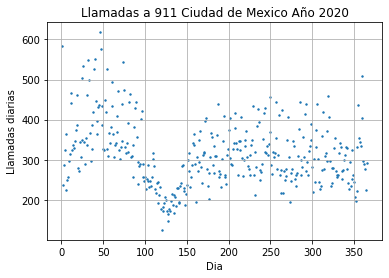

In [69]:
# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
X = DatosEntrenamiento.iloc[:, 1:-1].values
y = DatosEntrenamiento.iloc[:, -1].values


# Visualizar el conjunto de datos de entrenamiento
plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(X, y, s=2) # Datos observados
plt.show()

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = lin_reg.predict(X_poly)

In [67]:
df = pd.DataFrame({'Observados':y, 'Predichos':y_pred})
df

,Observados,Predichos
0,584,345.503372
1,236,345.894586
2,288,346.518308
3,324,347.354555
4,365,348.384127
...,...,...
360,298,288.836451
361,290,283.495779
362,277,277.611699
363,224,271.154522


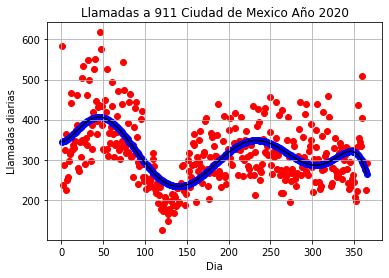

R^2 del Conjunto de entrenamiento= 0.3313128586237021


In [68]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'blue')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.show()

#Calcular el valor de R-cuadrado para el conjunto de entrenamiento
ValorR2E = r2_score(y,y_pred)
print("R^2 del Conjunto de entrenamiento=", ValorR2E)

**Variaciones**
R^2 del Conjunto de entrenamiento

grado R^2

4	0.16347982893030444

5	0.30907737329622165

6	0.32764879317743834

**7	0.3313128586237021**

8	0.2706487131672465

9	0.1991933581750157

10	0.11429999992424533

12	0.026034448994814774